## Лабораторная работа 3.

## Группа: РИМ-211060

### ФИО студентов:
#### Степаненко Дмитрий Владимирович
#### Стойчин Красимир Людмилов

## 0.1. Цель работы: изучить методы загрузки данных и запросов к ним с помощью Pandas.

### Задание:
##### 1. Загрузить данные из файла billing.csv.
##### 2. Выделить все сеансы связи, которые осуществлял абонент 79022810325 в период с 01.09.13 до 01.12.13 (включительно).
##### 3. Определить распределение сеансов связи по дням недели для абонента 79062863352.
##### 4. Определить идентификаторы базовых станций, где были зафиксированы сеансы связи абонента 79217570540.
##### 5. Определить распределение сеансов связи по часам в течении суток для абонента 79216666377.

### Для выполнения лабораторной работы вам понадобятся:
- Пособие А.В. Агафонова "Анализ данных с помощью языка Python" (см. вложение).
- Файл billing.csv (см. вложение).

## 0.2. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [77]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import csv
pd.options.mode.chained_assignment = None
import os

## 1. Загрузим данные из файла billing.csv:

In [78]:
defo = pd.read_csv('billing.csv', encoding = 'cp1251', sep = ';')

In [79]:
defo.head()

,A номер,B номер,IMSI,Дата (коммутатор),Продолжительность,Набрано,Переадресовано,IMEI,ID первой БС,Адрес первой БС,Коммутатор ID,Коммутатор,SMS центр,Тип записи,Тип соединения,Время по Москве,Номер,Контакт,LAC
0,79062863352,79022810325,2.509922e+14,01.09.2013 10:31:34,114.0,7.902281e+10,NaN,3.528330e+14,20463.0,"Энская обл, Энск г, Кольский, д.128",79062919999,Энск,NaN,Исходящий звонок,Local,01.09.2013 10:31:34,7.906286e+10,7.902281e+10,6238.0
1,79062863352,79057493732,2.509970e+14,01.09.2013 10:36:40,33.0,7.905749e+10,NaN,3.520691e+14,23226.0,"Энская обл, Энск г, Карла Либкнехта, д.27а",79062919999,Энск,NaN,Входящий звонок,Local,01.09.2013 10:36:40,7.905749e+10,7.906286e+10,6238.0
2,79062863352,79057493732,2.509922e+14,01.09.2013 10:36:41,31.0,7.905749e+10,NaN,3.528330e+14,20463.0,"Энская обл, Энск г, Кольский, д.128",79062919999,Энск,NaN,Исходящий звонок,Local,01.09.2013 10:36:41,7.906286e+10,7.905749e+10,6238.0
3,79062863352,79113009799,2.509922e+14,01.09.2013 10:47:51,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,01.09.2013 10:47:51,7.906286e+10,7.911301e+10,NaN
4,79062863352,79113009799,2.509922e+14,01.09.2013 10:47:55,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,01.09.2013 10:47:55,7.906286e+10,7.911301e+10,NaN


In [80]:
defo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A номер            3103 non-null   int64  
 1   B номер            3103 non-null   int64  
 2   IMSI               2511 non-null   float64
 3   Дата (коммутатор)  3102 non-null   object 
 4   Продолжительность  3102 non-null   float64
 5   Набрано            1331 non-null   float64
 6   Переадресовано     0 non-null      float64
 7   IMEI               1919 non-null   float64
 8   ID первой БС       1919 non-null   float64
 9   Адрес первой БС    1890 non-null   object 
 10  Коммутатор ID      3102 non-null   object 
 11  Коммутатор         3011 non-null   object 
 12  SMS центр          588 non-null    float64
 13  Тип записи         3102 non-null   object 
 14  Тип соединения     3102 non-null   object 
 15  Время по Москве    3102 non-null   object 
 16  Номер              3088 

In [81]:
defo.describe()

,A номер,B номер,IMSI,Продолжительность,Набрано,Переадресовано,IMEI,ID первой БС,SMS центр,Номер,Контакт,LAC
count,3.103000e+03,3.103000e+03,2.511000e+03,3102.000000,1.331000e+03,0.0,1.919000e+03,1919.000000,5.880000e+02,3.088000e+03,3.088000e+03,1919.000000
mean,7.908194e+10,7.918208e+10,2.509913e+14,43.532560,7.905988e+10,NaN,3.487785e+14,21398.941636,7.914011e+10,7.908321e+10,7.924413e+10,7744.924440
std,5.839400e+08,5.512619e+09,2.732943e+10,122.446822,4.479293e+08,NaN,4.102785e+13,5184.621069,8.177312e+07,1.057383e+08,5.340925e+09,5711.102787
min,7.088698e+10,7.963360e+07,2.502013e+14,0.000000,7.341394e+10,NaN,1.318300e+13,1081.000000,7.902326e+10,7.902282e+10,7.341394e+10,1227.000000
25%,7.906286e+10,7.906286e+10,2.509922e+14,0.000000,7.906286e+10,NaN,3.528330e+14,20362.000000,7.904349e+10,7.906286e+10,7.906286e+10,6238.000000
50%,7.906286e+10,7.906286e+10,2.509922e+14,0.000000,7.906286e+10,NaN,3.528330e+14,20363.000000,7.911201e+10,7.906286e+10,7.916371e+10,6238.000000
75%,7.911201e+10,7.921667e+10,2.509922e+14,35.000000,7.921667e+10,NaN,3.528330e+14,21233.000000,7.921960e+10,7.906286e+10,7.921667e+10,6238.000000
max,7.980673e+10,3.752957e+11,2.509979e+14,1790.000000,7.980673e+10,NaN,8.629960e+14,61922.000000,7.928990e+10,7.965499e+10,3.752957e+11,65011.000000


## 2. Выделим все сеансы связи, которые осуществлял абонент 79022810325 в период с 01.09.13 до 01.12.13 (включительно):

In [82]:
defo['Дата (коммутатор)'] = pd.to_datetime(defo['Дата (коммутатор)'], format = "%d.%m.%Y %H:%M:%S")
defo.dtypes

A номер                       int64
B номер                       int64
IMSI                        float64
Дата (коммутатор)    datetime64[ns]
Продолжительность           float64
Набрано                     float64
Переадресовано              float64
IMEI                        float64
ID первой БС                float64
Адрес первой БС              object
Коммутатор ID                object
Коммутатор                   object
SMS центр                   float64
Тип записи                   object
Тип соединения               object
Время по Москве              object
Номер                       float64
Контакт                     float64
LAC                         float64
dtype: object

In [83]:
filtering = defo.loc[(defo['Дата (коммутатор)'] > '2013-09-01 00:00:00') & (defo['Дата (коммутатор)'] < '2013-12-01 23:59:59') & ((defo['A номер'] == 79022810325) | (defo['B номер'] == 79022810325))]
filtering

,A номер,B номер,IMSI,Дата (коммутатор),Продолжительность,Набрано,Переадресовано,IMEI,ID первой БС,Адрес первой БС,Коммутатор ID,Коммутатор,SMS центр,Тип записи,Тип соединения,Время по Москве,Номер,Контакт,LAC
0,79062863352,79022810325,2.509922e+14,2013-09-01 10:31:34,114.0,7.902281e+10,NaN,3.528330e+14,20463.0,"Энская обл, Энск г, Кольский, д.128",79062919999,Энск,NaN,Исходящий звонок,Local,01.09.2013 10:31:34,7.906286e+10,7.902281e+10,6238.0
8,79022810325,79062863352,2.509922e+14,2013-09-01 14:48:01,99.0,7.906286e+10,NaN,3.528330e+14,21232.0,"Энская обл, Энск г, Скальная ул, д.7",79062919999,Энск,NaN,Входящий звонок,Local,01.09.2013 14:48:01,7.906286e+10,7.902281e+10,6238.0
9,79062863352,79022810325,2.509922e+14,2013-09-01 15:38:03,13.0,7.902281e+10,NaN,3.528330e+14,20302.0,"Энская обл, Энск г, Героев Североморцев, д.50",79062919999,Энск,NaN,Исходящий звонок,Local,01.09.2013 15:38:03,7.906286e+10,7.902281e+10,6238.0
13,79062863352,79022810325,2.509922e+14,2013-09-02 09:23:48,26.0,7.902281e+10,NaN,3.528330e+14,20122.0,"Энская обл, Энск г, Шмидта ул, д.12, Центральн...",79062919999,Энск,NaN,Исходящий звонок,Local,02.09.2013 09:23:48,7.906286e+10,7.902281e+10,6238.0
1746,79062863352,79022810325,2.509922e+14,2013-11-21 11:43:56,133.0,7.902281e+10,NaN,3.528330e+14,20362.0,"Энская обл, Энск г, Буркова ул, д.6, СЭС",79062919999,Энск,NaN,Исходящий звонок,Local,21.11.2013 11:43:56,7.906286e+10,7.902281e+10,6238.0
1747,79062863352,79022810325,NaN,2013-11-21 11:48:12,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,21.11.2013 11:48:12,7.906286e+10,7.902281e+10,NaN
1763,79062863352,79022810325,NaN,2013-11-22 08:11:21,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,22.11.2013 08:11:21,7.906286e+10,7.902281e+10,NaN
1765,79062863352,79022810325,NaN,2013-11-22 08:30:50,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,22.11.2013 08:30:50,7.906286e+10,7.902281e+10,NaN
1767,79062863352,79022810325,NaN,2013-11-22 08:36:17,0.0,NaN,NaN,NaN,NaN,NaN,79062919999,Энск,NaN,SMS Исходящее,Local,22.11.2013 08:36:17,7.906286e+10,7.902281e+10,NaN
1799,79022810325,79062863352,2.509922e+14,2013-11-22 16:37:15,59.0,7.906286e+10,NaN,3.528330e+14,20363.0,"Энская обл, Энск г, Буркова ул, д.6, СЭС",79062919999,Энск,NaN,Входящий звонок,Local,22.11.2013 16:37:15,7.906286e+10,7.902281e+10,6238.0


## 3. Определим распределение сеансов связи по дням недели для абонента 79062863352:

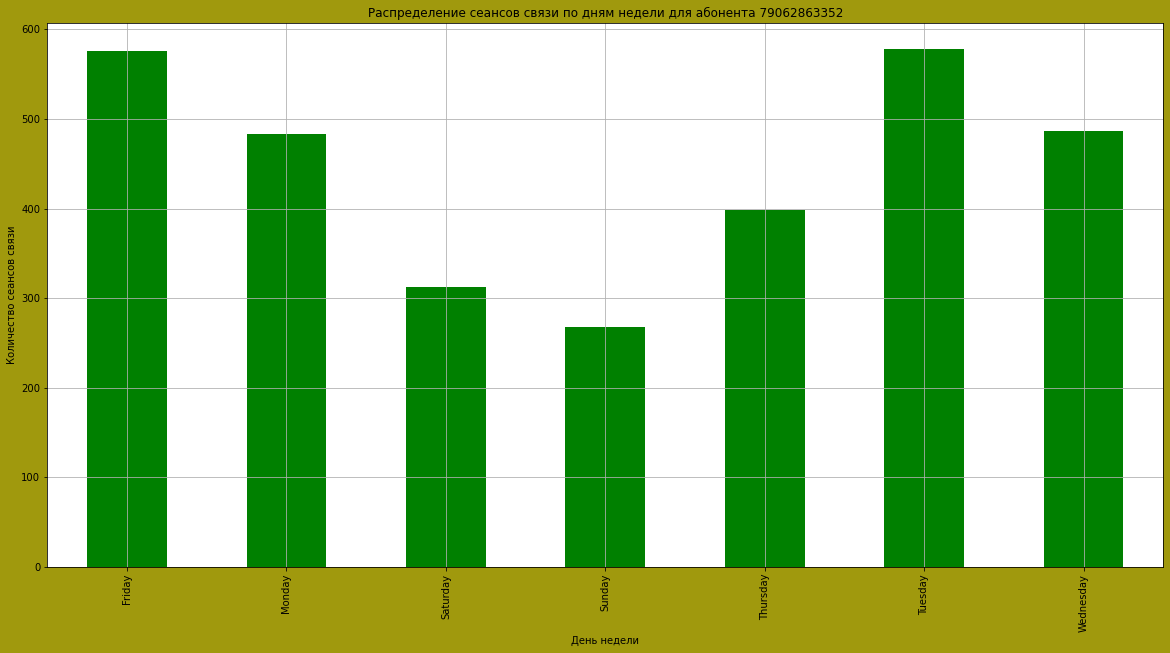

In [84]:
filtering = defo.loc[(defo['A номер'] == 79062863352) | (defo['B номер'] == 79062863352)]
fig = plt.figure(figsize=(20,10), facecolor='#A0990D')
filtering = filtering.groupby(filtering['Дата (коммутатор)'].dt.day_name())['Дата (коммутатор)'].count().plot(kind = 'bar', color = 'green')
plt.grid()
plt.xlabel("День недели")
plt.ylabel("Количество сеансов связи")
plt.title("Распределение сеансов связи по дням недели для абонента 79062863352", fontweight = 'normal')
plt.show()

## 4. Определим идентификаторы базовых станций, где были зафиксированы сеансы связи абонента 79217570540:

In [85]:
filtering = defo.loc[(defo['A номер'] == 79217570540)]
filtering['ID первой БС'] = filtering['ID первой БС'].astype(int)
filtering[filtering.columns[5:10]]

,Набрано,Переадресовано,IMEI,ID первой БС,Адрес первой БС
736,7.906286e+10,NaN,3.528330e+14,20363,"Энская обл, Энск г, Буркова ул, д.6, СЭС"
739,7.906286e+10,NaN,3.528330e+14,21791,"Энская обл, Энск г, Фрунзе, ТП ООО Гидротехник"


## 5. Определим распределение сеансов связи по часам в течении суток для абонента 79216666377:

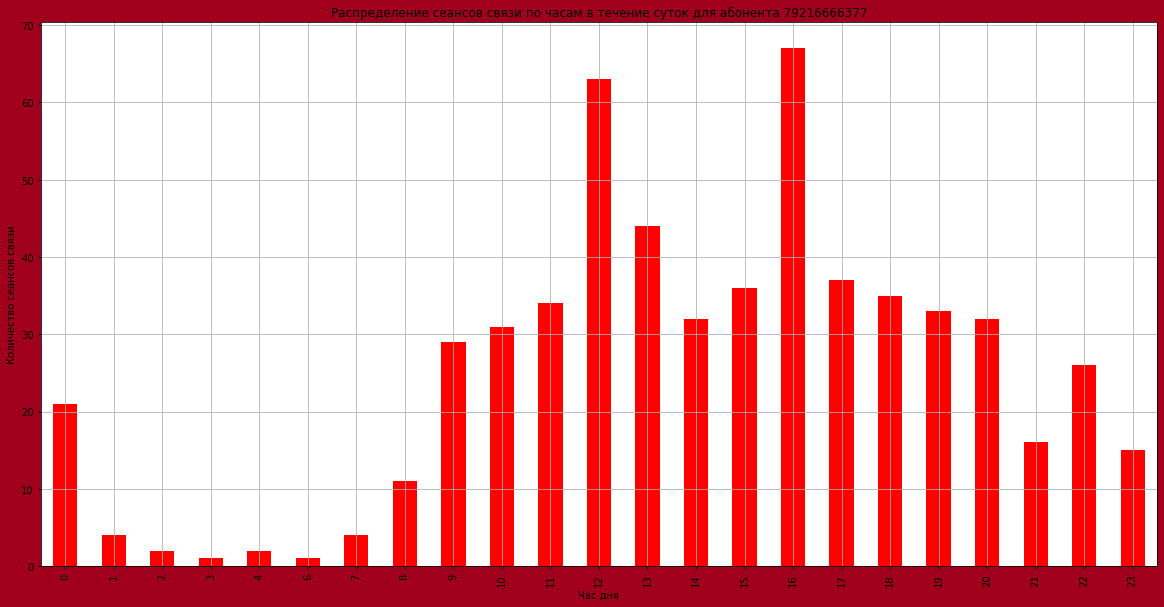

In [86]:
filtering = defo[(defo['A номер'] == 79216666377) | (defo['B номер'] == 79216666377)]
fig = plt.figure(figsize=(20,10), facecolor='#A1001D')
filtering.groupby(filtering['Дата (коммутатор)'].dt.hour)['Дата (коммутатор)'].count().plot(kind='bar', color = 'red')
plt.grid()
plt.xlabel("Час дня")
plt.ylabel("Количество сеансов связи")
plt.title("Распределение сеансов связи по часам в течение суток для абонента 79216666377", fontweight='normal')
plt.show()

#### В ходе выполнения данной лабораторной работы были рассмотрены практические возможности встроенных библиотек (загрузка и запросы к данным, их визуализация) в pandas и matplotlib. По итогам работы оценен полученный результат и дана обобщённая оценка полученным результатам.